In [24]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
import datetime as dt

import yfinance as yf
yf.pdr_override()
from datetime import datetime

In [35]:
stocks = "GOOG SPY".split()
start =dt.date.today() - dt.timedelta(365)

In [38]:
data = pdr.get_data_yahoo(stocks, start)["Close"]
data.head()

[*********************100%***********************]  2 of 2 completed


,GOOG,SPY
Date,,
2022-02-17 00:00:00-05:00,132.308502,437.059998
2022-02-18 00:00:00-05:00,130.467499,434.230011
2022-02-22 00:00:00-05:00,129.402496,429.570007
2022-02-23 00:00:00-05:00,127.584999,421.950012
2022-02-24 00:00:00-05:00,132.673492,428.299988


In [39]:
returns = np.log(data).diff()
returns.head()

,GOOG,SPY
Date,,
2022-02-17 00:00:00-05:00,NaN,NaN
2022-02-18 00:00:00-05:00,-0.014012,-0.006496
2022-02-22 00:00:00-05:00,-0.008196,-0.010790
2022-02-23 00:00:00-05:00,-0.014145,-0.017898
2022-02-24 00:00:00-05:00,0.039108,0.014937


In [43]:
# Get coorolation
#get smaller sample
sample= returns.sample(60).corr()
sample

,GOOG,SPY
GOOG,1.000000,0.864875
SPY,0.864875,1.000000


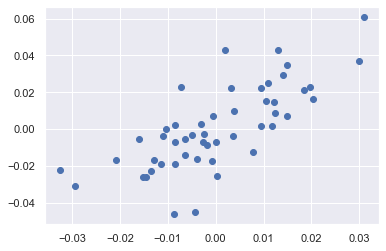

In [51]:
sample = returns.sample(50)
plt.scatter(x=sample["SPY"], y=sample["GOOG"]);

In [52]:
reg = np.polyfit(sample["SPY"], sample["GOOG"], deg = 1)
reg

array([1.25280246e+00, 6.18099652e-04])

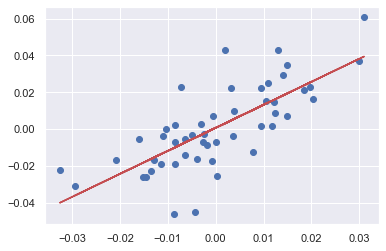

In [56]:
trend = np.polyval(reg, sample['SPY'])
plt.scatter(sample["SPY"], sample["GOOG"])
plt.plot(sample["SPY"], trend, "r")

# Regression as technical Indicator


In [62]:
data = pd.DataFrame(pdr.get_data_yahoo("SPY", start)["Close"])
time = np.arange(1, len(data) + 1)
data["time"] = time
data = data[["time", "Close"]]
data = round(data, 2)
data.tail()

[*********************100%***********************]  1 of 1 completed


,time,Close
Date,,
2023-02-10 00:00:00-05:00,247,408.04
2023-02-13 00:00:00-05:00,248,412.83
2023-02-14 00:00:00-05:00,249,412.64
2023-02-15 00:00:00-05:00,250,413.98
2023-02-16 00:00:00-05:00,251,408.28


In [65]:
reg = np.polyfit(data["time"], data["Close"], deg =1)
reg

array([-1.75952343e-01,  4.24420354e+02])

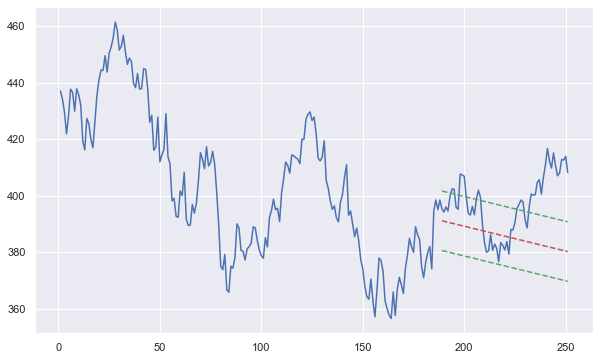

In [74]:
trend = np.polyval(reg, data['time'][-63:])
std = data['Close'][-63:].std()
plt.figure(figsize=(10,6))
plt.plot(data["time"], data["Close"], label="S&P500")
plt.plot(data['time'][-63:], trend,"r--")
plt.plot(data['time'][-63:], trend - std,"g--")
plt.plot(data['time'][-63:], trend + std,"g--")

In [75]:
predict = np.poly1d(reg)
predict(254)

379.72845866059595

In [76]:
std

10.539470426276617

# Simple Scatter Plot with trend line


<AxesSubplot:xlabel='time', ylabel='Close'>

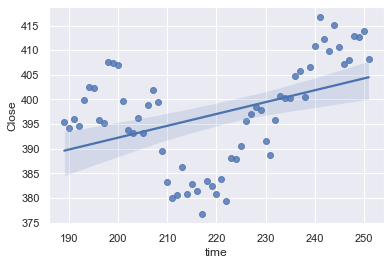

In [77]:
sb.regplot(x='time', y = 'Close', fit_reg=True, data=data[-63:])